In [31]:
import seaborn as sns

import warnings 
warnings.filterwarnings('ignore')

In [1]:
from synabon.stat import generate_objects_ids

# Create object ids

In [14]:
df = generate_objects_ids(n_unique_objects=100, n_records_per_object=10)
df.head(10)

,object_id
0,cd52802f-06bd-42a3-b81c-8e7c314f18a8
1,42ec7ad3-3c0c-43d3-b30b-879c70147ab0
2,b39a06fc-7c69-4719-bf51-c9a4eeedf244
3,eff7f09a-51e6-4cc8-8f06-eaaabcb75383
4,69e435fd-687a-42ac-888b-b75aa5cbfe8c
5,c5dc2937-7a3b-4949-9662-55d6f61f3a0f
6,f49299c0-cd8b-4d49-85d2-4532cc0eb44a
7,087e3061-e296-4d4d-baef-8823fcd84816
8,6ab67ebf-5a32-4294-bdc4-4901a0fdfae3
9,69e435fd-687a-42ac-888b-b75aa5cbfe8c


In [15]:
df.shape

(1000, 1)

In [16]:
df["object_id"].nunique()

100

# Add Date column to dataframe

In [17]:
from datetime import datetime

In [18]:
start_dt = datetime.strptime("2023/01/01", "%Y/%m/%d")
end_dt = datetime.strptime("2023/02/01", "%Y/%m/%d")

In [19]:
from synabon.stat import add_date

In [22]:
df = add_date(data=df, start_dt=start_dt, end_dt=end_dt, column_name="interaction_date")

In [23]:
df.head(10)

,object_id,interaction_date
0,cd52802f-06bd-42a3-b81c-8e7c314f18a8,2023-01-21 17:44:19
1,42ec7ad3-3c0c-43d3-b30b-879c70147ab0,2023-01-28 15:16:17
2,b39a06fc-7c69-4719-bf51-c9a4eeedf244,2023-01-25 04:45:22
3,eff7f09a-51e6-4cc8-8f06-eaaabcb75383,2023-01-31 11:47:47
4,69e435fd-687a-42ac-888b-b75aa5cbfe8c,2023-01-12 02:00:21
5,c5dc2937-7a3b-4949-9662-55d6f61f3a0f,2023-01-01 05:18:36
6,f49299c0-cd8b-4d49-85d2-4532cc0eb44a,2023-01-12 04:55:24
7,087e3061-e296-4d4d-baef-8823fcd84816,2023-01-02 20:51:12
8,6ab67ebf-5a32-4294-bdc4-4901a0fdfae3,2023-01-08 00:26:13
9,69e435fd-687a-42ac-888b-b75aa5cbfe8c,2023-01-20 17:32:41


[Text(19358.0, 0, '2023-01-01'),
 Text(19362.0, 0, '2023-01-05'),
 Text(19366.0, 0, '2023-01-09'),
 Text(19370.0, 0, '2023-01-13'),
 Text(19374.0, 0, '2023-01-17'),
 Text(19378.0, 0, '2023-01-21'),
 Text(19382.0, 0, '2023-01-25'),
 Text(19386.0, 0, '2023-01-29'),
 Text(19389.0, 0, '2023-02-01')]

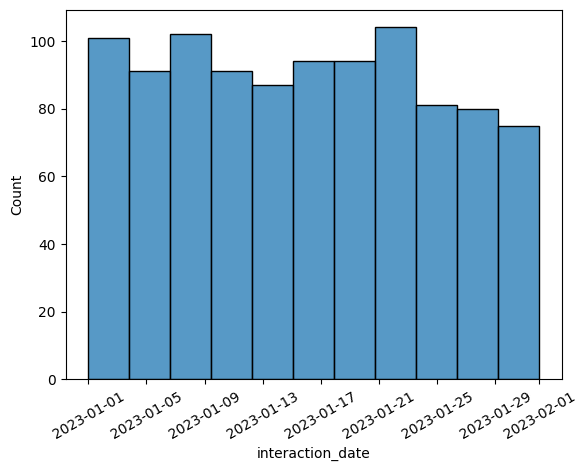

In [35]:
g = sns.histplot(data=df, x="interaction_date")
g.set_xticklabels(g.get_xticklabels(), rotation=30)

# Add Category column to dataframe

In [24]:
from synabon.stat import add_category

In [26]:
values = ["Male", "Female", "Gender-Fluid"]

In [27]:
df = add_category(data=df, values=values, column_name="gender")

In [28]:
df.head()

,object_id,interaction_date,gender
0,cd52802f-06bd-42a3-b81c-8e7c314f18a8,2023-01-21 17:44:19,Gender-Fluid
1,42ec7ad3-3c0c-43d3-b30b-879c70147ab0,2023-01-28 15:16:17,Gender-Fluid
2,b39a06fc-7c69-4719-bf51-c9a4eeedf244,2023-01-25 04:45:22,Female
3,eff7f09a-51e6-4cc8-8f06-eaaabcb75383,2023-01-31 11:47:47,Male
4,69e435fd-687a-42ac-888b-b75aa5cbfe8c,2023-01-12 02:00:21,Female


[Text(0, 0, 'Gender-Fluid'), Text(1, 0, 'Female'), Text(2, 0, 'Male')]

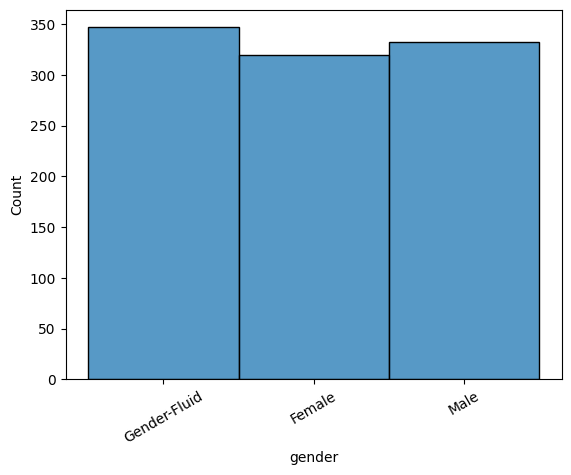

In [36]:
g = sns.histplot(data=df, x="gender")
g.set_xticklabels(g.get_xticklabels(), rotation=30)

# Add Continous column to dataframe

In [37]:
from synabon.stat import add_continuous

In [38]:
df = add_continuous(data=df, column_name="money_spent")

In [39]:
df.head()

,object_id,interaction_date,gender,money_spent
0,cd52802f-06bd-42a3-b81c-8e7c314f18a8,2023-01-21 17:44:19,Gender-Fluid,9.657741
1,42ec7ad3-3c0c-43d3-b30b-879c70147ab0,2023-01-28 15:16:17,Gender-Fluid,8.324621
2,b39a06fc-7c69-4719-bf51-c9a4eeedf244,2023-01-25 04:45:22,Female,9.837155
3,eff7f09a-51e6-4cc8-8f06-eaaabcb75383,2023-01-31 11:47:47,Male,8.309737
4,69e435fd-687a-42ac-888b-b75aa5cbfe8c,2023-01-12 02:00:21,Female,10.978014


<Axes: xlabel='money_spent', ylabel='Density'>

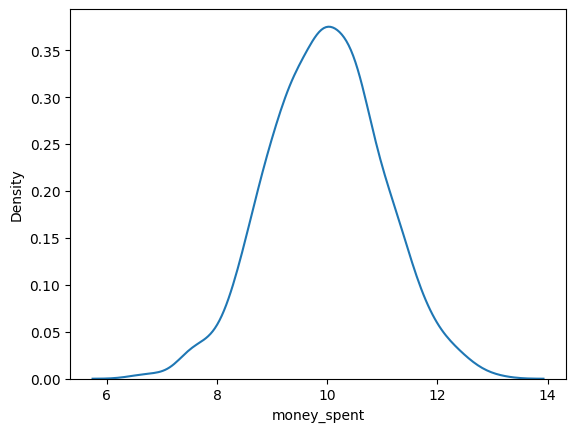

In [41]:
sns.kdeplot(x="money_spent", data=df)

<Axes: xlabel='money_spent', ylabel='Density'>

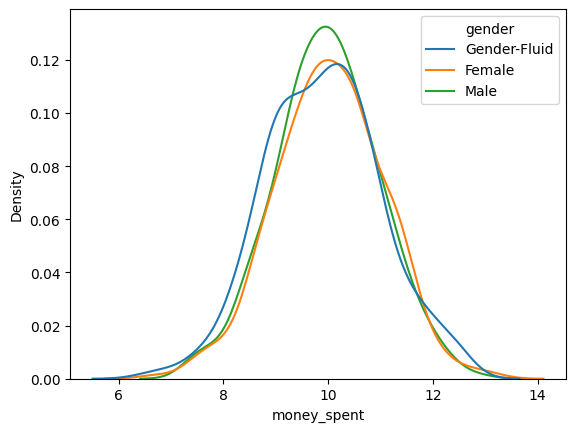

In [42]:
sns.kdeplot(x="money_spent", hue="gender", data=df)

[Text(19358.0, 0, '2023-01-01'),
 Text(19362.0, 0, '2023-01-05'),
 Text(19366.0, 0, '2023-01-09'),
 Text(19370.0, 0, '2023-01-13'),
 Text(19374.0, 0, '2023-01-17'),
 Text(19378.0, 0, '2023-01-21'),
 Text(19382.0, 0, '2023-01-25'),
 Text(19386.0, 0, '2023-01-29'),
 Text(19389.0, 0, '2023-02-01')]

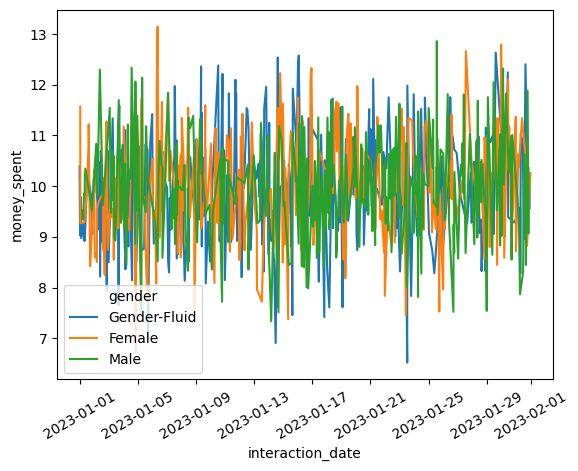

In [45]:
g = sns.lineplot(x="interaction_date", y="money_spent", hue="gender", data=df)
g.set_xticklabels(g.get_xticklabels(), rotation=30)